In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
print(os.getcwd())

C:\Users\shiva\Documents\Python-revice\Projects-DataAnalysis


#### Read CSV

In [6]:
pd_Content=pd.read_csv("./Accerture/Content.csv")
pd_reaction=pd.read_csv("./Accerture/Reactions.csv")
pd_reactionTypes=pd.read_csv("./Accerture/ReactionTypes.csv")

### Shape

In [9]:
pd_Content.shape

(1000, 6)

In [11]:
pd_reaction.shape

(25553, 5)

In [13]:
pd_reactionTypes.shape

(16, 4)

### Finding Missing Values

In [16]:
pd_Content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [18]:
pd_reaction.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [20]:
pd_reactionTypes.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [22]:
#plot the missing values

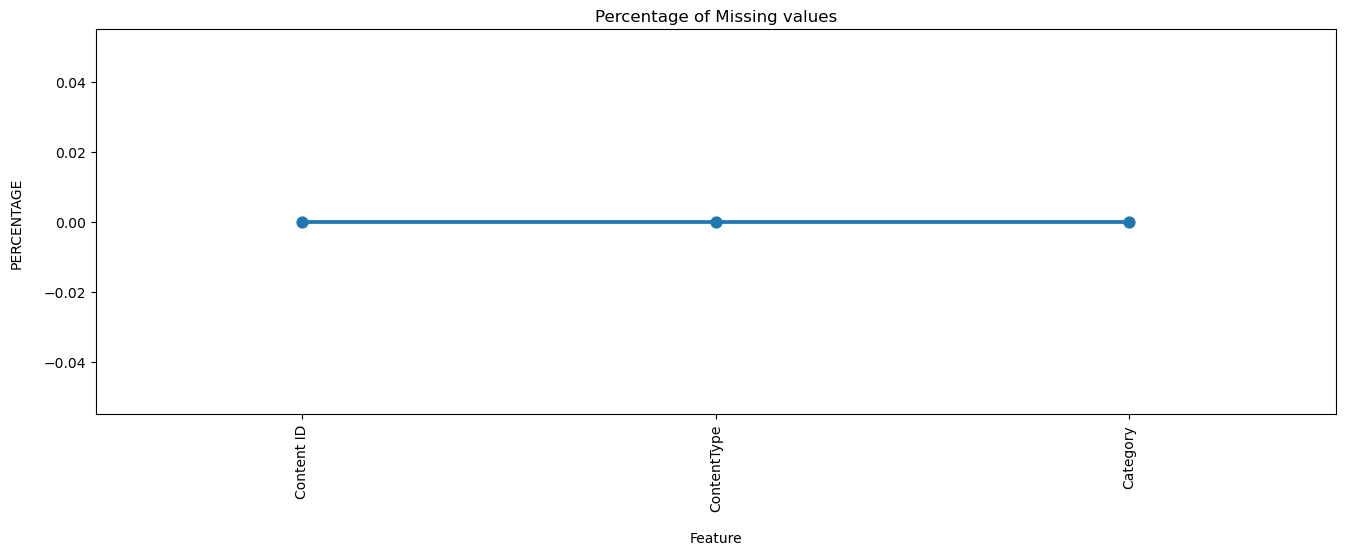

In [75]:
missing = pd.DataFrame((pd_Content.isnull().sum())*100/pd_Content.shape[0]).reset_index()
missing.columns = ['column', 'percentage']  # Rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percentage',data=missing)
plt.xlabel("Feature",labelpad=14)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE",labelpad=14)
plt.show()

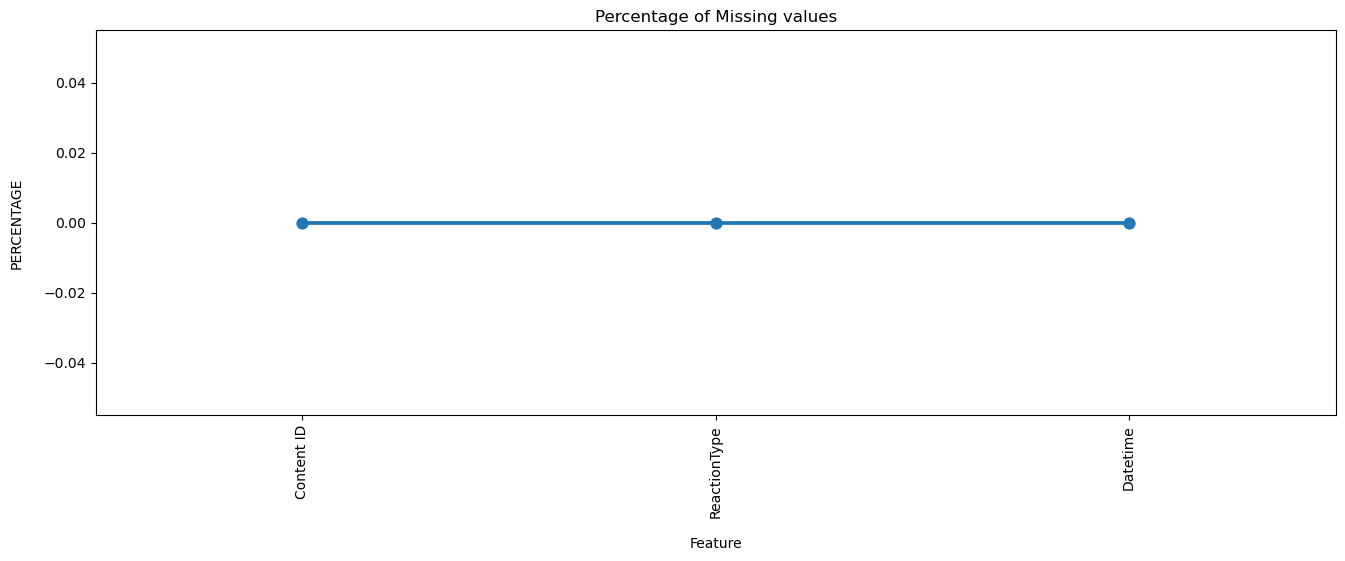

In [77]:
missing = pd.DataFrame((pd_reaction.isnull().sum())*100/pd_reaction.shape[0]).reset_index()
missing.columns = ['column', 'percentage']  # Rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percentage',data=missing)
plt.xlabel("Feature",labelpad=14)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE",labelpad=14)
plt.show()

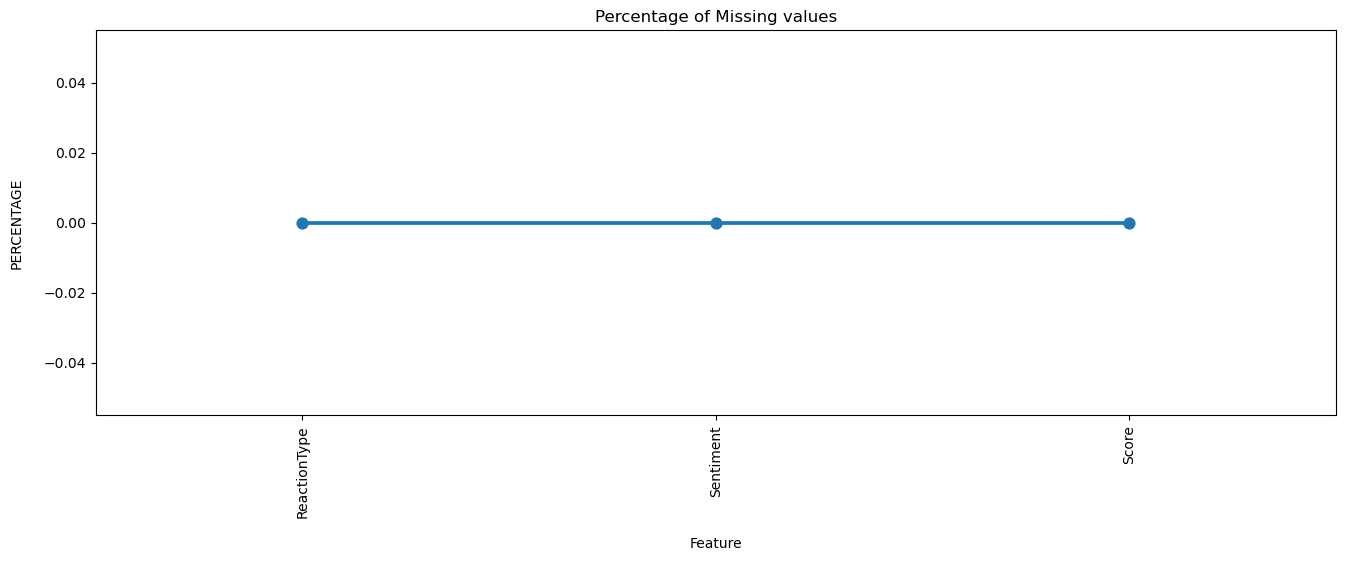

In [79]:
missing = pd.DataFrame((pd_reactionTypes.isnull().sum())*100/pd_reactionTypes.shape[0]).reset_index()
missing.columns = ['column', 'percentage']  # Rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percentage',data=missing)
plt.xlabel("Feature",labelpad=14)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE",labelpad=14)
plt.show()

### Remove the Rows that are missing 

In [33]:
pd_Content.dropna(how = 'any', inplace = True)

In [35]:
pd_reaction.dropna(how = 'any', inplace = True)

#### Change the data types if needed

In [40]:
#get the dtpes of each data set
# pd_Content = pd.to_numeric(telco_data.TotalCharges, errors='coerce')#if there is invalid parsing the it is converted to Nan
# pd_Content[columns_to_convert]=pd_Content[columns_to_convert].apply(pd.,errors="coerce")

In [42]:
pd_reaction.dtypes
columns_to_convert=["Datetime"]
pd_reaction[columns_to_convert]=pd_reaction[columns_to_convert].apply(pd.to_datetime,errors='coerce')

#### Rename the Columns in Data Types

In [48]:
pd_Content.rename(columns={'Type': 'ContentType'}, inplace=True)
pd_reaction.rename(columns={'Type':'ReactionType'},inplace=True)
pd_reactionTypes.rename(columns={'Type':'ReactionType'},inplace=True)


#### Drop the columns that are unnessesary 

In [50]:
pd_Content.drop(columns= ['Unnamed: 0',"User ID","URL"], axis=1, inplace=True)
pd_reaction.drop(columns= ['Unnamed: 0',"User ID"], axis=1, inplace=True)
pd_reactionTypes.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)

In [54]:
pd_Content.drop(columns= ["URL"], axis=1, inplace=True)

In [56]:
pd_Content.head()

,Content ID,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


#### Look for Top Three Performing Columns

In [437]:
pd_Content.shape

(801, 3)

In [439]:
pd_reaction.shape

(22534, 3)

In [59]:
#Create the data set Merging the tables Of Reaction and Content

In [469]:
missing_matches = pd_reaction[(pd_reaction['Content ID'].isin(pd_Content['Content ID']))]

In [475]:
missing_matches.loc[missing_matches["Content ID"]=="97522e57-d9ab-4bd6-97bf-c24d952602d2"]

,Content ID,ReactionType,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2020-12-07 06:27:54
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,cherish,2021-04-11 17:35:49
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,hate,2021-01-27 08:32:09
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2021-04-01 22:54:23
11,97522e57-d9ab-4bd6-97bf-c24d952602d2,indifferent,2020-11-07 08:36:27


In [467]:
len(missing_matches)

4150

### Merge Data Sets

In [61]:
# Merge the datasets on 'contentid' and 'userid'
merged_df = pd.merge(pd_Content, pd_reaction, on=['Content ID'], how='inner')

In [477]:
merged_df.loc[merged_df["Content ID"]=="97522e57-d9ab-4bd6-97bf-c24d952602d2"]

,Content ID,ContentType,Category,ReactionType,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,peeking,2020-12-07 06:27:54
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,cherish,2021-04-11 17:35:49
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,hate,2021-01-27 08:32:09
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,peeking,2021-04-01 22:54:23
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,indifferent,2020-11-07 08:36:27


In [404]:
merged_df.loc[merged_df["Content ID"]=="97522e57-d9ab-4bd6-97bf-c24d952602d2"]

,Content ID,ContentType,Category,ReactionType,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,peeking,2020-12-07 06:27:54
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,cherish,2021-04-11 17:35:49
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,hate,2021-01-27 08:32:09
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,peeking,2021-04-01 22:54:23
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,indifferent,2020-11-07 08:36:27


In [65]:
mergedwithreaction = pd.merge(merged_df, pd_reactionTypes,on='ReactionType', how='left')


In [67]:
mergedwithreaction

,Content ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58,positive,30
...,...,...,...,...,...,...,...
18379,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-10-31 04:50:14,negative,12
18380,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,dislike,2020-06-27 09:46:48,negative,10
18381,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,2021-02-16 17:17:02,positive,45
18382,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-11-04 20:08:31,negative,12


In [275]:
mergedwithreaction['Category'] = mergedwithreaction['Category'].str.lower()

In [277]:
Catogory_Score=mergedwithreaction.groupby("Category",as_index=False)["Score"].sum()

In [362]:
Catogory_Score.sort_values("Score",ascending=False)

,Category,Score
14,travel,53935
9,science,53657
7,healthy eating,52745
0,animals,52443
1,cooking,49681
2,culture,47710
6,food,47576
12,technology,46683
4,education,45103
13,tennis,43612


In [285]:
mergedwithreaction.drop(columns=["NormalizedCategory"],inplace=True)

In [288]:
len(Catogory_Score)

16

In [290]:
Catogory_Reaction_Score=mergedwithreaction.groupby(["Category","ReactionType"])["Score"].sum().reset_index(name="score")

In [292]:
Catogory_Reaction_Score

,Category,ReactionType,score
0,animals,adore,5616
1,animals,cherish,5880
2,animals,disgust,0
3,animals,dislike,720
4,animals,hate,455
...,...,...,...
251,veganism,peeking,2415
252,veganism,scared,990
253,veganism,super love,4500
254,veganism,want,4130


In [294]:
Top5Catogories=Catogory_Score.sort_values("Score",ascending=False).head(5)

In [296]:
with pd.ExcelWriter('combined_data2.xlsx') as writer:
    mergedwithreaction.to_excel(writer, sheet_name='Cleaned Data Set', index=False)
    Top5Catogories.to_excel(writer, sheet_name='Top5Catogories', index=False)

In [297]:
mergedwithreaction.head(20)

,Content ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,2020-11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,2021-06
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,2021-04
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,2021-01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,2020-08
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,peeking,2020-12-07 06:27:54,neutral,35,2020-12
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,cherish,2021-04-11 17:35:49,positive,70,2021-04
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,hate,2021-01-27 08:32:09,negative,5,2021-01
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,peeking,2021-04-01 22:54:23,neutral,35,2021-04
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,indifferent,2020-11-07 08:36:27,neutral,20,2020-11


In [300]:
#plot the distribution of the catogories

In [302]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize=10,horizontalalignment='center')

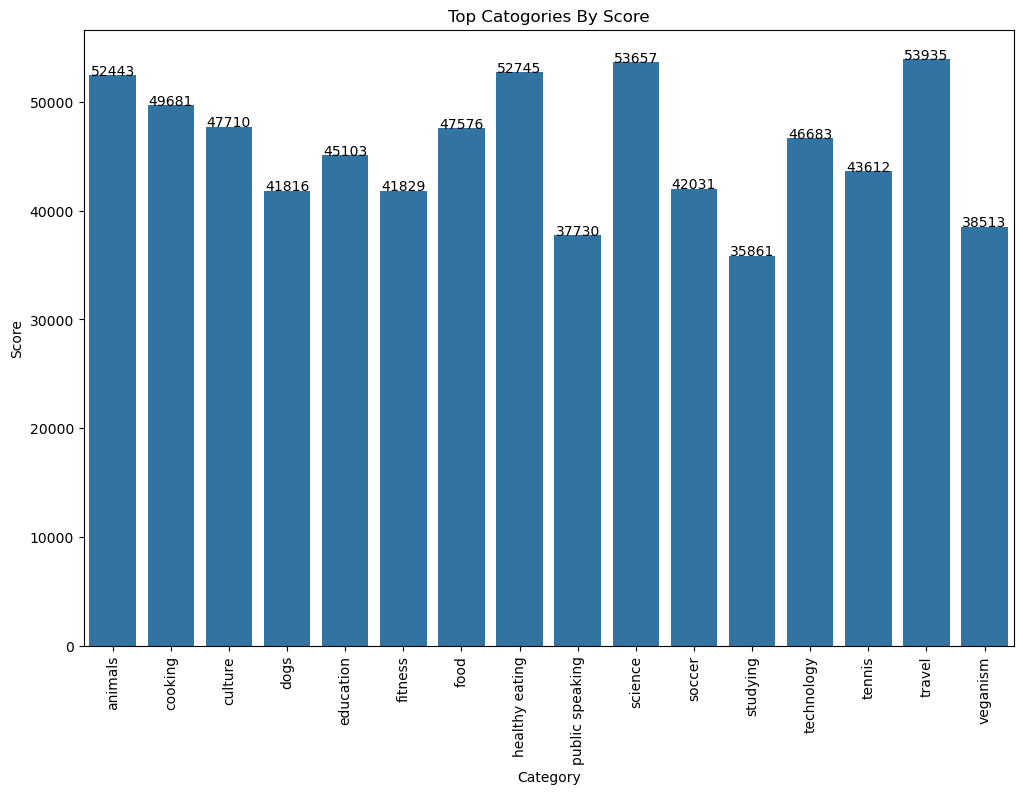

In [434]:
plt.figure(figsize=(12,8))
sns.barplot(x="Category",y="Score",data=Catogory_Score)
add_labels(Catogory_Score.Category.values,Catogory_Score.Score.values)#here bins are integers and 
plt.title("Top Catogories By Score")
plt.xticks(rotation=90)
plt.savefig('top_categories_by_score.png',bbox_inches='tight')  # Save as PNG file

plt.show()


In [306]:
#plot the distribution of the catogories for each reaction type Top Catogory

In [308]:
Catogory_Reaction_Score.head(10)

,Category,ReactionType,score
0,animals,adore,5616
1,animals,cherish,5880
2,animals,disgust,0
3,animals,dislike,720
4,animals,hate,455
5,animals,heart,5040
6,animals,indifferent,1500
7,animals,interested,2310
8,animals,intrigued,3735
9,animals,like,3450


In [310]:
top_category = Top5Catogories.iloc[0]['Category']

In [312]:
top_category

'travel'

In [314]:
Reaction_For_Top_Category=Catogory_Reaction_Score.loc[Catogory_Reaction_Score.Category== top_category]

In [352]:
Reaction_For_Top_Category.score.sum()

53935

In [316]:
len(Reaction_For_Top_Category)

16

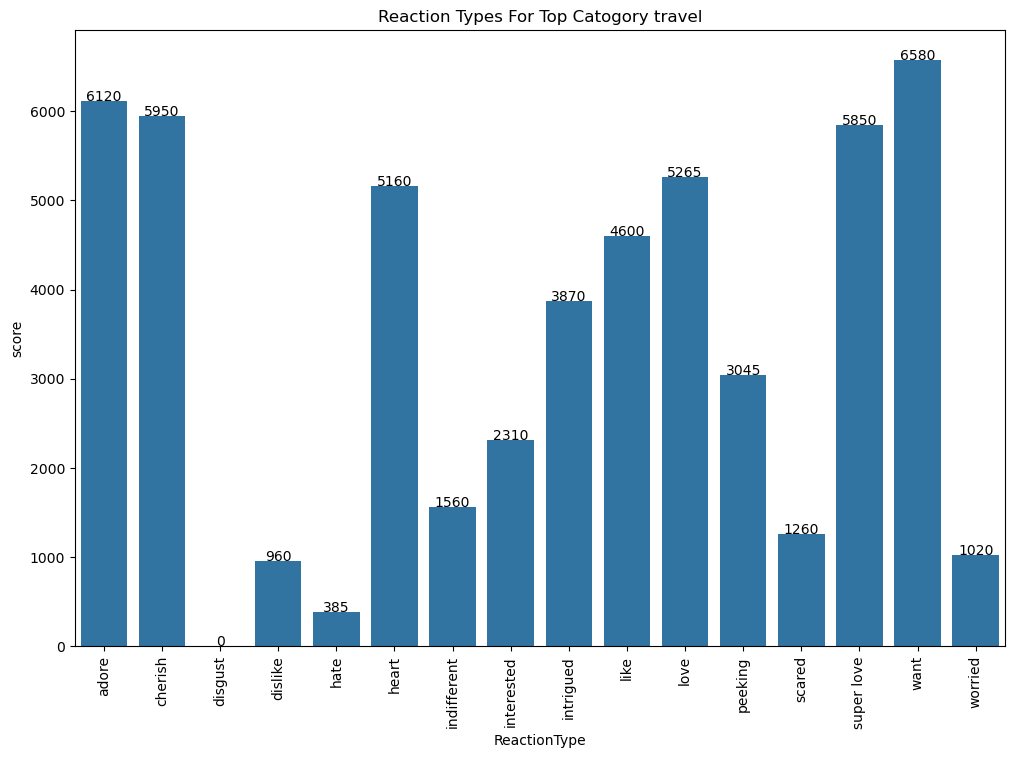

In [384]:
plt.figure(figsize=(12,8))
sns.barplot(x="ReactionType",y="score",data=Reaction_For_Top_Category)
add_labels(Reaction_For_Top_Category.ReactionType.values,Reaction_For_Top_Category.score.values)#here bins are integers and 
plt.xticks(rotation=90)


plt.title(f'Reaction Types For Top Catogory {top_category}')
plt.savefig('ScoreofreactionType.png',bbox_inches='tight')  # Save as PNG file
plt.show()

In [320]:
#Do the same With Pie Chart

In [322]:
mergedwithreaction.head(10)

,Content ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,2020-11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,2021-06
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,2021-04
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,2021-01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,2020-08
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,peeking,2020-12-07 06:27:54,neutral,35,2020-12
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,cherish,2021-04-11 17:35:49,positive,70,2021-04
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,hate,2021-01-27 08:32:09,negative,5,2021-01
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,peeking,2021-04-01 22:54:23,neutral,35,2021-04
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,indifferent,2020-11-07 08:36:27,neutral,20,2020-11


In [324]:
# Extract month and year for grouping
mergedwithreaction['Month'] = mergedwithreaction['Datetime'].dt.to_period('M')

In [326]:
mergedwithreaction

,Content ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,2020-11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,2021-06
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,2021-04
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,2021-01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,2020-08
...,...,...,...,...,...,...,...,...
18379,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-10-31 04:50:14,negative,12,2020-10
18380,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,dislike,2020-06-27 09:46:48,negative,10,2020-06
18381,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,2021-02-16 17:17:02,positive,45,2021-02
18382,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-11-04 20:08:31,negative,12,2020-11


In [328]:
monthly_reactions = mergedwithreaction.groupby('Month').size().reset_index(name='PostCount')

In [330]:
monthly_reactions

,Month,PostCount
0,2020-06,656
1,2020-07,1542
2,2020-08,1612
3,2020-09,1501
4,2020-10,1553
5,2020-11,1514
6,2020-12,1585
7,2021-01,1573
8,2021-02,1426
9,2021-03,1502


In [354]:
monthly_reactions.PostCount.sum()

18384

In [332]:

# Sort by month
monthly_reactions = monthly_reactions.sort_values(by='Month')

In [334]:
monthly_reactions

,Month,PostCount
0,2020-06,656
1,2020-07,1542
2,2020-08,1612
3,2020-09,1501
4,2020-10,1553
5,2020-11,1514
6,2020-12,1585
7,2021-01,1573
8,2021-02,1426
9,2021-03,1502


In [336]:
#We need to see Monthly posts

In [338]:
# mergedwithreaction.drop_duplicates(subset=["Content ID","Datetime"])

In [340]:
#Check if we really have duplicated rows

In [342]:
duplicate_rows = mergedwithreaction[mergedwithreaction.duplicated(subset=['Content ID', 'Datetime'], keep=False)]


In [344]:
duplicate_rows

,Content ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score,Month


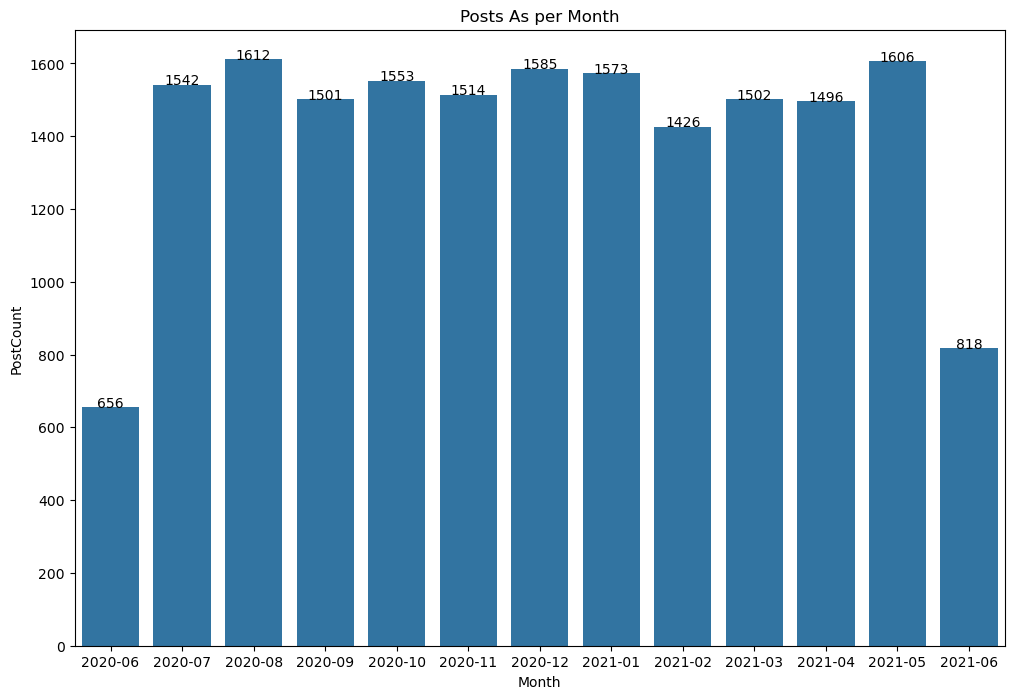

In [380]:
plt.figure(figsize=(12,8))
plt.title("Posts As per Month")

sns.barplot(x="Month",y="PostCount",data=monthly_reactions)
add_labels(monthly_reactions.Month.values,monthly_reactions.PostCount.values)#here bins are integers and 
plt.savefig('MonthlyPostRates.png',bbox_inches='tight')




In [348]:
mergedwithreaction.head(10)

,Content ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,2020-11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,2021-06
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,2021-04
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,2021-01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,2020-08
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,peeking,2020-12-07 06:27:54,neutral,35,2020-12
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,cherish,2021-04-11 17:35:49,positive,70,2021-04
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,hate,2021-01-27 08:32:09,negative,5,2021-01
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,peeking,2021-04-01 22:54:23,neutral,35,2021-04
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,indifferent,2020-11-07 08:36:27,neutral,20,2020-11
